# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, 1:-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0   1    2    3   4   5    6   7   8    9    10   11   12  13  14  15  \
0    84  44   65  128  55   8  150  46  19  148  169  325  176  82   1  11   
1    86  42   65  116  53   6  152  45  19  141  175  335  172  85   5   4   
2    97  45   76  175  60   9  157  42  20  149  180  370  169  63  16  12   
3   112  50  104  197  58  11  208  32  24  159  223  639  186  67  15  22   
4    97  42  101  186  59   9  186  36  22  138  208  511  168  67   7  41   
5   110  53  104  223  66  10  211  32  24  164  223  659  210  67   5  16   
6   104  50   96  211  65  10  187  35  22  156  207  527  195  65   3   7   
7    93  40   73  139  58   6  136  49  18  138  166  275  137  73   0   0   
8    93  43   78  162  64   8  137  48  18  145  156  281  159  63  17  12   
9    86  43   68  150  64   9  138  48  18  143  161  285  174  69   6   0   
10   93  43   78  166  59   7  151  44  19  141  182  342  174  68  15   2   
11   84  36   75  136  55   6  140  48  18  125  166  290  138  71   4  36   
12   78  36   51  116  56   4  120  57  17  124  135  209  135  84   1  12   
13   88  39   88  194  69   8  168  40  20  133  199  416  151  74   3  22   
14   89  38   74  138  59   7  136  49  18  133  167  278  128  72   7   7   

     16   17  
0   179  183  
1   179  183  
2   198  206  
3   191  202  
4   194  206  
5   190  203  
6   195  206  
7   187  188  
8   203  210  
9   192  201  
10  193  197  
11  189  195  
12  177  184  
13  186  192  
14  189  193

Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

0           1           2           3           4           5   \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean    93.877960   44.888889   82.566485  169.295082   61.642987    8.566485   
std      8.246966    6.203399   15.775849   33.349953    7.967776    4.630276   
min     73.000000   34.000000   44.000000  105.000000   47.000000    2.000000   
25%     88.000000   40.000000   70.000000  141.000000   57.000000    7.000000   
50%     93.000000   44.000000   80.000000  169.000000   61.000000    8.000000   
75%    100.000000   50.000000   98.000000  195.000000   65.000000   10.000000   
max    119.000000   59.000000  112.000000  333.000000  138.000000   55.000000   

               6           7           8           9           10  \
count  549.000000  549.000000  549.000000  549.000000  549.000000   
mean   169.577413   40.770492   20.644809  148.132969  189.513661   
std     33.411829    7.767032    2.615136   14.562431   31.678159   
min    115.000000   26.000000   17.000000  118.000000  135.000000   
25%    147.000000   33.000000   19.000000  137.000000  168.000000   
50%    157.000000   43.000000   20.000000  146.000000  179.000000   
75%    200.000000   46.000000   23.000000  159.000000  217.000000   
max    265.000000   59.000000   29.000000  188.000000  320.000000   

                11          12          13          14          15  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    443.741348  174.925319   72.610200    6.455373   12.561020   
std     178.410149   32.732937    7.554496    5.148906    9.018554   
min     196.000000  109.000000   60.000000    0.000000    0.000000   
25%     319.000000  149.000000   68.000000    2.000000    6.000000   
50%     365.000000  174.000000   72.000000    5.000000   11.000000   
75%     600.000000  199.000000   75.000000   10.000000   18.000000   
max    1018.000000  268.000000  135.000000   22.000000   40.000000   

               16          17  
count  549.000000  549.000000  
mean   188.816029  195.493625  
std      6.024345    7.374154  
min    176.000000  181.000000  
25%    184.000000  190.000000  
50%    188.000000  196.000000  
75%    193.000000  201.000000  
max    206.000000  211.000000

In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
dtypes: int32(18)
memory usage: 38.7 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
X_train_pd.mean(axis = 0)

0      93.877960
1      44.888889
2      82.566485
3     169.295082
4      61.642987
5       8.566485
6     169.577413
7      40.770492
8      20.644809
9     148.132969
10    189.513661
11    443.741348
12    174.925319
13     72.610200
14      6.455373
15     12.561020
16    188.816029
17    195.493625
dtype: float64

In [6]:
X_train_pd.shape, X_test.shape

((549, 18), (297, 18))

In [7]:
### YOUR CODE HERE
train_mean = X_train_pd.mean().to_numpy()
train_std = X_train_pd.std(axis = 0).to_numpy()
X_train_npd = (X_train_pd - train_mean)/train_std
X_test_n = (X_test - train_mean)/train_std

In [8]:
X_test_n

array([[-1.19776894, -1.11050233, -0.54301258, ...,  0.82485284,
        -0.96542096, -0.60937493],
       [ 0.86359516,  1.79113279,  1.10507621, ..., -0.83838496,
        -0.46744153, -0.33815739],
       [-0.59148538, -0.62689648,  0.09086772, ...,  0.6030878 ,
        -0.13545524,  0.611104  ],
       ...,
       [-0.47022867,  0.82392108,  0.4711959 , ...,  0.71397032,
         0.36252419,  0.47549523],
       [ 0.13605489,  0.01791133, -0.1626844 , ...,  0.6030878 ,
         1.69046934,  1.15353908],
       [ 0.13605489, -0.14329062,  0.09086772, ..., -0.72750244,
         1.69046934,  1.42475662]])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from scikitplot.metrics import plot_roc

In [26]:
### YOUR CODE HERE
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)
sc = StandardScaler()
pipe = Pipeline(steps = [('scale', sc),
                         ('lr', model)])
param_grid = {} 
gscv = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose = 10, return_train_score = True,)
model = gscv.fit(X_train, y_train) 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START ...........................................................
[CV 1/10; 1/1] END ........., score=(train=0.806, test=0.818) total time=   0.0s
[CV 2/10; 1/1] START ...........................................................
[CV 2/10; 1/1] END ........., score=(train=0.818, test=0.800) total time=   0.0s
[CV 3/10; 1/1] START ...........................................................
[CV 3/10; 1/1] END ........., score=(train=0.810, test=0.782) total time=   0.0s
[CV 4/10; 1/1] START ...........................................................
[CV 4/10; 1/1] END ........., score=(train=0.822, test=0.673) total time=   0.0s
[CV 5/10; 1/1] START ...........................................................
[CV 5/10; 1/1] END ........., score=(train=0.818, test=0.800) total time=   0.0s
[CV 6/10; 1/1] START ...........................................................
[CV 6/10; 1/1] END ........., score=(train=0.810

In [27]:
model = gscv.best_estimator_
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

In [28]:
accuracy = f1_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'macro')
accuracy, f1

(0.7811447811447811, 0.7748432411284524)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

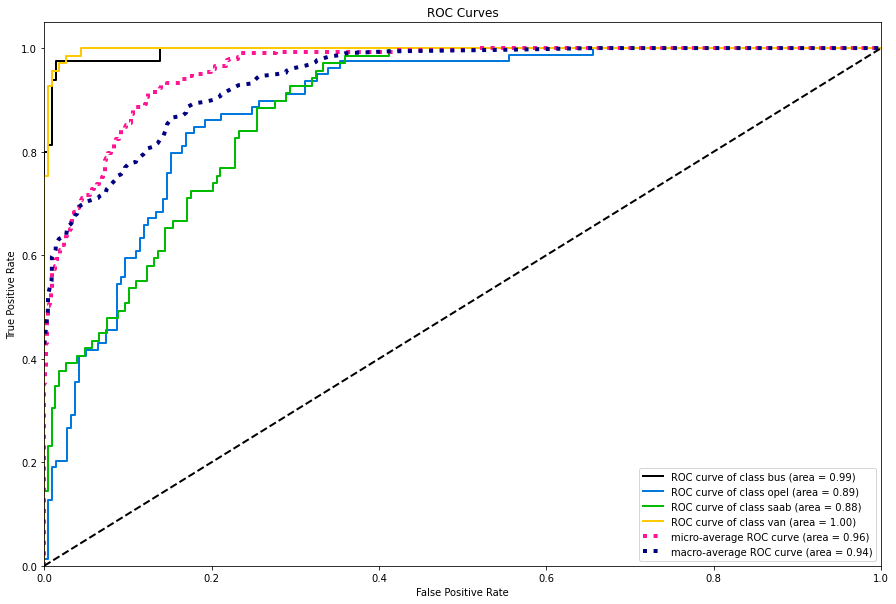

In [29]:
plot_roc(y_test, y_pred_proba, figsize=(15, 10))

In [14]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [76]:
### YOUR CODE HERE
n_comp = 17
pca_model = PCA(n_components = n_comp)
pca_model.fit(X_train_npd)

PCA(n_components=17)

In [77]:
var_cum = np.cumsum(pca_model.explained_variance_ratio_)
per_vc = var_cum * 100

In [78]:
number_ev = np.arange(per_vc.shape[0])

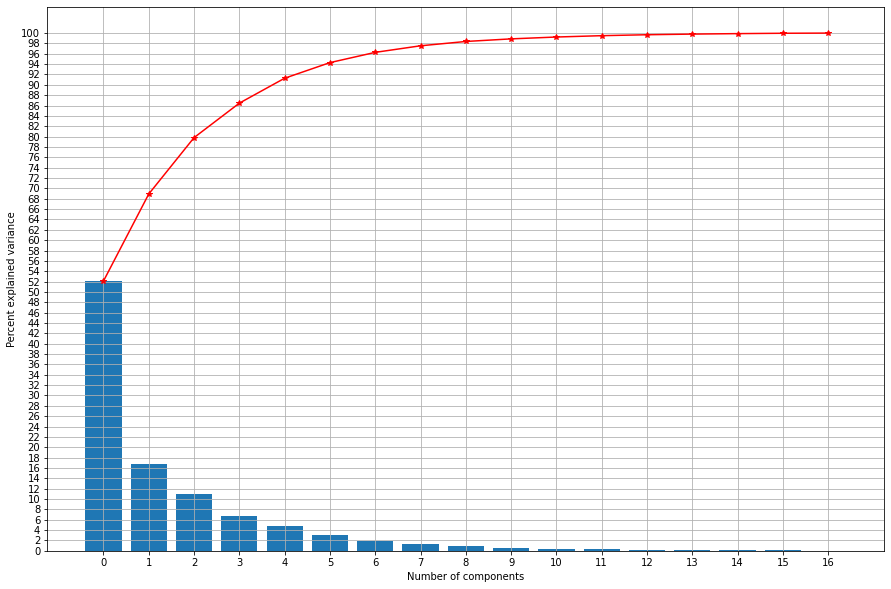

In [79]:
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlabel('Number of components')
ax.set_ylabel('Percent explained variance')
ax.bar(number_ev, pca_model.explained_variance_ratio_ * 100)
plt.xticks(number_ev)
plt.yticks(range(0,  102, 2))
plt.grid()
plt.plot(number_ev, per_vc, 'r*-')

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?
*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

**Answer:**
- I used 9 components, because this components count is describe 99% of variance of data, and to describe 100% of varience needed count of components increase very slow, but data count, which we obtain for 1% of varience - almost half of all data.

In [69]:
### YOUR CODE HERE
num_components = 9
pca = PCA(num_components)
pca.fit(X_train_npd)
X_train_pca = pca.transform(X_train_npd)
X_test_pca = pca.transform(X_test_n)

In [70]:
X_train_pca.shape, X_test_pca.shape

((549, 9), (297, 9))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [71]:
### YOUR CODE HERE
### YOUR CODE HERE
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)
sc = StandardScaler()
pca = PCA(9)
pipe = Pipeline(steps = [
    ('scaler',  sc),
    ('pca', pca),
    ('lr', model)
])

param_grid = {} 

gscv = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose = 10, return_train_score = True,)
model_pca = gscv.fit(X_train, y_train) 

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START ...........................................................
[CV 1/10; 1/1] END ........., score=(train=0.743, test=0.727) total time=   0.0s
[CV 2/10; 1/1] START ...........................................................
[CV 2/10; 1/1] END ........., score=(train=0.745, test=0.764) total time=   0.0s
[CV 3/10; 1/1] START ...........................................................
[CV 3/10; 1/1] END ........., score=(train=0.749, test=0.727) total time=   0.0s
[CV 4/10; 1/1] START ...........................................................
[CV 4/10; 1/1] END ........., score=(train=0.757, test=0.582) total time=   0.0s
[CV 5/10; 1/1] START ...........................................................
[CV 5/10; 1/1] END ........., score=(train=0.735, test=0.745) total time=   0.0s
[CV 6/10; 1/1] START ...........................................................
[CV 6/10; 1/1] END ........., score=(train=0.741

In [72]:
model_pca = gscv.best_estimator_
y_pred_proba = model_pca.predict_proba(X_test)
y_pred = model_pca.predict(X_test)

In [73]:
accuracy = f1_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'macro')
accuracy, f1

(0.7037037037037037, 0.6924756696010116)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

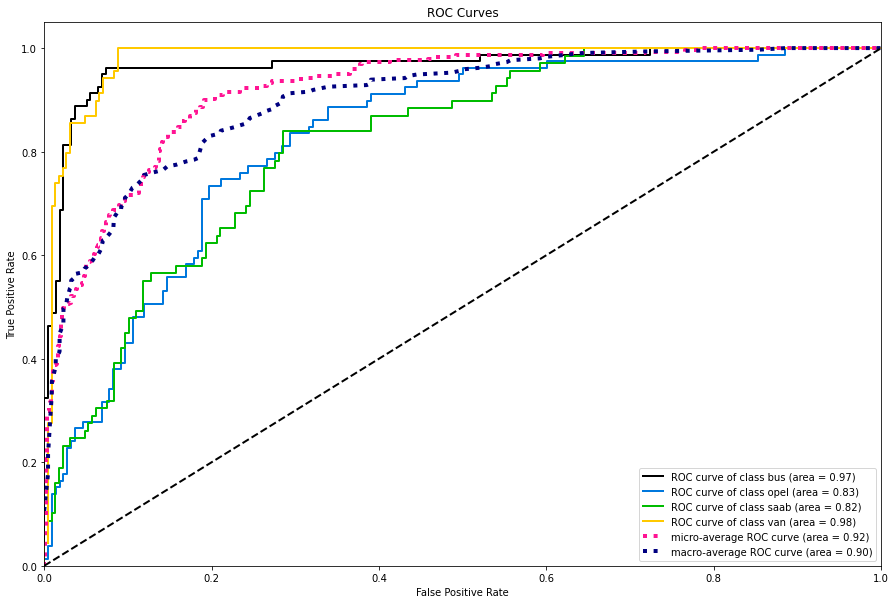

In [74]:
plot_roc(y_test, y_pred_proba, figsize=(15, 10))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [133]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
params = {'max_depth' : range(2, 100),
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_features': ['auto', 'sqrt', 'log2'],
          'splitter': ['best', 'random']
         }
model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_features = 'log2')
gscv = GridSearchCV(model, param_grid=params, cv = 10, verbose = 4)
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 1764 candidates, totalling 17640 fits
[CV 1/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.491 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.473 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.400 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.491 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.418 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.509 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=2, max_features=auto,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.509 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.444 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.436 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.400 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.436 total time=   0.0s
[CV 6/10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, max_features=sqrt, splitter=random;, score=0.519 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.473 total time=   0.0s
[CV 5/10

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=gini, max_depth=7, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=7, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=7, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=7, max_features=auto, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=best;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=8, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END cr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=9, max_features=log2, splitter=best;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=9, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=9, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 3/10] END 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=gini, max_depth=11, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=11, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=11, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.800 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.473 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=11, max_features=auto, splitter=random;, score=0.636 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=best;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=12, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3

[CV 9/10] END criterion=gini, max_depth=13, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=13, max_features=sqrt, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=13, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.782 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=14, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=15, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=15, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=15, max_features=auto, splitter=best;, score=0.636 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=16, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=17, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=17, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=17, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=gini, max_depth=19, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=19, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=19, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=19, max_features=auto, splitter=random;, score=0.636 total time=   0.

[CV 2/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=20, max_features=sqrt, splitter=random;, score=0.648 total time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.800 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=22, max_features=auto, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=22, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=22, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=22, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.564 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=23, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 10/10]

[CV 7/10] END criterion=gini, max_depth=24, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=24, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=24, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=24, max_features=log2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=24, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=24, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=24, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=24, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=24, max_features=log2, splitter=random;, score=0.636 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.509 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=26, max_features=sqrt, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=27, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=27, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 2/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=29, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=29, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=29, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.764 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=30, max_features=auto, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=30, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=30, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=30, max_features=sqrt, splitter=best;, score=0.655 total time=   0.

[CV 2/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=31, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=33, max_features=auto, splitter=random;, score=0.673 total time=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=34, max_features=sqrt, splitter=random;, score=0.600 total time=

[CV 3/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=35, max_features=log2, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=36, max_features=auto, splitter=best;, score=0.745 total time= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=37, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=38, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=38, max_features=log2, splitter=random;, score=0.691 total time= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=40, max_features=auto, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=40, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=40, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=40, max_features=sqrt, splitter=best;, score=0.618 total time=   0.

[CV 5/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=41, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=41, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=41, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=41, max_features=log2, splitter=best;, score=0.564 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=43, max_features=auto, splitter=best;, score=0.778 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=43, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=43, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=43, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=44, max_features=sqrt, splitter=random;, score=0.582 total time=

[CV 8/10] END criterion=gini, max_depth=45, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=45, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=45, max_features=log2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=46, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=46, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=47, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=gini, max_depth=48, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=48, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=48, max_features=auto, splitter=random;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=48, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=49, max_features=sqrt, splitter=random;, score=0.455 total time=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.800 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=50, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=50, max_features=log2, splitter=random;, score=0.655 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=52, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=52, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=52, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=52, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=52, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=52, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=52, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=52, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=52, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=53, max_features=sqrt, splitter=random;, score=0.545 total time=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=55, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=55, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=55, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=55, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=55, max_features=log2, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=55, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=55, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=55, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=55, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=57, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=58, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=59, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=59, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=59, max_features=sqrt, splitter=best;, score=0.691 total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=60, max_features=auto, splitter=random;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=60, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=61, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=61, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=61, max_features=log2, splitter=best;, score=0.636 total time=   

[CV 10/10] END criterion=gini, max_depth=62, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=62, max_features=log2, splitter=random;, score=0.709 total time= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=gini, max_depth=63, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=63, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=64, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=65, max_features=auto, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=best;, score=0.855 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=66, max_features=sqrt, splitter=random;, score=0.545 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=67, max_features=log2, splitter=best;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=67, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=68, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=69, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=69, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=69, max_features=auto, splitter=best;, score=0.618 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=gini, max_depth=70, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=70, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=70, max_features=auto, splitter=random;, score=0.618 total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=best;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=71, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[

[CV 8/10] END criterion=gini, max_depth=72, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=72, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=72, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=72, max_features=log2, splitter=random;, score=0.636 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.545 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=74, max_features=auto, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=74, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=74, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=74, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=best;, score=0.796 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=75, max_features=sqrt, splitter=random;, score=0.636 total time= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr


[CV 8/10] END criterion=gini, max_depth=76, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=76, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=76, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.800 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=76, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[C

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=78, max_features=auto, splitter=best;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=78, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=78, max_features=auto, splitter=random;, score=0.745 total time=   0.0s
[CV 3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=79, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 2/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=80, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=81, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=81, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=82, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10]

[CV 9/10] END criterion=gini, max_depth=83, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=83, max_features=log2, splitter=random;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.800 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=84, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=85, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=86, max_features=log2, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=87, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=87, max_features=auto, splitter=best;, score=0.655 total time=   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=88, max_features=log2, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=89, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=best;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=90, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 2/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=91, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=91, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=gini, max_depth=92, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=92, max_features=sqrt, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=92, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=93, max_features=log2, splitter=random;, score=0.618 total time=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=gini, max_depth=95, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=95, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=95, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=95, max_features=auto, splitter=best;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=95, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=95, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=95, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=95, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=95, max_features=auto, splitter=random;, score=0.727 total time=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=96, max_features=auto, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=96, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=gini, max_depth=97, max_features=auto, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=97, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 9/1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=98, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 2/1

[CV 8/10] END criterion=gini, max_depth=99, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=99, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=99, max_features=log2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.364 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=99, max_features=log2, splitter=random;, score=0.709 total time=   0.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.364 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.473 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.400 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.455 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=3, max_features=sqrt, splitter=random;, score=0.426 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.545 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.45

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.455 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.455 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, max_features=auto, splitter=random;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.400 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.473 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=6, max_features=sqrt, splitter=random;, score=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr


[CV 9/10] END criterion=entropy, max_depth=7, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=7, max_features=sqrt, splitter=random;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=7, max_features=log2, splitter=best;, score=0.673 total

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=8, max_features=sqrt, splitter=random;, score=0.426 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=8, max_features=log2, splitter=best;, score=0.673 total ti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=9, max_features=log2, splitter=best;, score=0.691 total time=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=10, max_features=log2, splitter=random;, score=0.673

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=11, max_features=log2, splitter=random;, score=0.673

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=12, max_features=log2, splitter=best;, score=0.655 to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=13, max_features=log2, splitter=random;, score=0.618

[CV 10/10] END criterion=entropy, max_depth=14, max_features=log2, splitter=random;, score=0.537 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=15, max_features=auto, splitter=best;, score=0.655

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=auto, splitter=best;, score=0.648 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=16, max_features=log2, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=auto, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=17, max_features=log2, splitter=random;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=18, max_features=log2, splitter=random;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=best;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=19, max_features=log2, splitter=random;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=20, max_features=log2, splitter=random;, score=0.673

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=21, max_features=log2, splitter=random;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=best;, score=0.800 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=23, max_features=auto, splitter=random;, sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=24, max_features=auto, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=25, max_features=sqrt, splitter=random;, score=0.6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=26, max_features=sqrt, splitter=random;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=26, max_features=log2, splitter=best

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=29, max_features=auto, splitter=best;, score=0.722 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=30, max_features=auto, splitter=random;, sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=31, max_features=auto, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=31, max_features=sqrt, splitter=best

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=entropy, max_depth=32, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=32, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=32, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=32, max_features=auto, splitter=random;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=32, max_features=sqrt, splitter=best;, score=0.782 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=32, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=32, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=32, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=32, max_features=sqrt, splitter=best;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=33, max_features=sqrt, splitter=best;, score=0.691 to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=34, max_features=sqrt, splitter=random

[CV 2/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=35, max_features=log2, splitter=best;, score=0.630 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=37, max_features=auto, splitter=best;, score=0.667 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=38, max_features=auto, splitter=random;, sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=39, max_features=sqrt, splitter=random;, score=0.782

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=40, max_features=sqrt, splitter=rando

[CV 5/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=41, max_features=log2, splitter=random;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=43, max_features=auto, splitter=best;, score=0.667 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=best;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=44, max_features=auto, splitter=random

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=45, max_features=sqrt, splitter=best;, score=0.636 to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=46, max_features=sqrt, splitter=random;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=47, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=47, max_features=sqrt, splitter=random;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=47, max_features=log2, splitter=best;, score=0.6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=50, max_features=auto, splitter=random;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=best;, score=0.527 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=51, max_features=auto, splitter=random;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=52, max_features=auto, splitter=best;, score=0.704 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=52, max_features=log2, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=53, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=53, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=53, max_features=auto, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=53, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=54, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=54, max_features=auto, splitter=best;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=55, max_features=auto, splitter=random;, score=0.5

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=55, max_features=log2, splitter=random;, score=0.500 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=56, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=56, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=56, max_features=auto, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=56, max_features=log2, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=57, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=57, max_features=log2, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.545 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=58, max_features=auto, splitter=best;, score=0.6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=best;, score=0.519 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=58, max_features=log2, splitter=random;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=60, max_features=auto, splitter=best;, score=0.704 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=61, max_features=auto, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=62, max_features=auto, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=62, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=62, max_features=sqrt, splitter=best;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=63, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.782 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=63, max_features=sqrt, splitter=best;, score=0.709

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=64, max_features=sqrt, splitter=random;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=64, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=64, max_features=log2, splitter=best;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=65, max_features=log2, splitter=best;, score=0.667 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=68, max_features=auto, splitter=random;, score=0.8

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=69, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=69, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=69, max_features=sqrt, splitter=best;, score=0.7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=70, max_features=sqrt, splitter=random;, sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=71, max_features=log2, splitter=random;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=74, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=74, max_features=auto, splitter=random;, score=0.491 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=74, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=74, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=74, max_features=auto, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=74, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=74, max_features=sqrt, splitter=best;, score=0.800 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=74, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=74, max_features=sqrt, splitter=best;, sco

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=75, max_features=sqrt, splitter=random;,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=76, max_features=log2, splitter=random

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=78, max_features=auto, splitter=rando

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=79, max_features=sqrt, splitter=best;, score=0.655 to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=80, max_features=sqrt, splitter=random;, s

[CV 5/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=81, max_features=log2, splitter=random;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=83, max_features=auto, splitter=best;, score=0.704 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=84, max_features=auto, splitter=random;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=85, max_features=sqrt, splitter=random;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=86, max_features=log2, splitter=random;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.564 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=88, max_features=auto, splitter=best;, score=0.685 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=89, max_features=auto, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=89, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=89, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=89, max_features=sqrt, splitter=best;, s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=90, max_features=sqrt, splitter=best;, score=0.636 to

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr


[CV 3/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.473 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=91, max_features=auto, splitter=random;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=91, max_features=sqrt, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=best;, score=0.818 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=random;, score=0.800 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=92, max_features=auto, splitter=random;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=93, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=93, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=93, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=93, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=93, max_features=auto, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=93, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=93, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=93, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=93, max_features=sqrt, splitter=best;, sco

[CV 2/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=94, max_features=sqrt, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr


[CV 1/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=95, max_features=log2, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=96, max_features=log2, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=best;, score=0.473 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=97, max_features=log2, splitter=random;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=entropy, max_depth=98, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=98, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=99, max_features=auto, splitter=best;, score=0.6

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.400 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.473 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.400 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.400 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.455 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.418 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.345 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=2, max_features=auto, splitter=random;, score=0.278 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=2, max_features=sqrt, splitter=best

[CV 8/10] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.473 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.400 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=0.481 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.455 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.473 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=0.473 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=rand

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=7, max_features=auto, splitter=best;, score=0.630 t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=8, max_features=sqrt, splitter=random;, score=0.463 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=8, max_features=log2, splitter=best

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=9, max_features=log2, splitter=random;, score=0.7

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=best;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=11, max_features=auto, splitter=rando

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=12, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=12, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=12, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=12, max_features=auto, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=12, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=12, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=12, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=12, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=12, max_features=sqrt, splitter=bes

[CV 3/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.800 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=best;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=13, max_features=log2, splitter=random;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=log_loss, max_depth=14, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=14, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=14, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=15, max_features=auto, splitter=best;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=16, max_features=auto, splitter=random;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=16, max_features=sqrt, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=17, max_features=sqrt, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=18, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=18, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=18, max_features=log2, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=19, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.782 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=21, max_features=auto, splitter=random;, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=log_loss, max_depth=22, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=22, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=22, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=22, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=22, max_features=auto, splitter=random;, score=0.741 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=22, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=22, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=22, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=22, max_features=sqrt, splitter=b

[CV 1/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=23, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=23, max_features=sqrt, split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.491 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=24, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=26, max_features=auto, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=27, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=27, max_features=auto, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.509 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=28, max_features=sqrt, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=29, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=29, max_features=log2, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=best;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=30, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=31, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=31, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=31, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=31, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=32, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=32, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=32, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=32, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=32, max_features=auto, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=33, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=33, max_features=auto, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=34, max_features=sqrt, splitter=r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=35, max_features=log2, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=36, max_features=sqrt, splitter=random;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=36, max_features=log2, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=37, max_features=sqrt, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=38, max_features=log2, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=log_loss, max_depth=39, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=39, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=39, max_features=sqrt, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;, score=0.564 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=39, max_features=log2, splitter=best;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=log_loss, max_depth=40, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=40, max_features=log2, splitter=best;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=best;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=41, max_features=sqrt, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=log_loss, max_depth=42, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=42, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=42, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=42, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=42, max_features=sqrt, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=42, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=42, max_features=log2, splitter=best;, score=0.818 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=42, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=42, max_features=log2, splitter=b

[CV 7/10] END criterion=log_loss, max_depth=43, max_features=log2, splitter=random;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=43, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=43, max_features=log2, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=43, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=44, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=44, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=44, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=44, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=44, max_features=auto, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=44, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=45, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=45, max_features=auto, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=best;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=45, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=45, max_features=log2, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=best;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=47, max_features=auto, splitter=random;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=48, max_features=sqrt, splitter=random;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=49, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=49, max_features=sqrt, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=50, max_features=sqrt, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=51, max_features=sqrt, splitter=random;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.509 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=52, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=52, max_features=log2, splitter=best;, score=0.545 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=52, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=52, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=best;, score=0.818 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=53, max_features=sqrt, splitter=r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=54, max_features=sqrt, splitter=random;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.418 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=55, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=55, max_features=log2, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=random;, score=0.800 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=56, max_features=sqrt, splitter=ran

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=57, max_features=sqrt, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=57, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=57, max_features=log2, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=58, max_features=sqrt, splitter=rando

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=59, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=59, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=59, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=59, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=59, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=59, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=59, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=59, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=59, max_features=log2, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=60, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=63, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=63, max_features=auto, split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.527 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=64, max_features=sqrt, splitter=random;, score=0.545 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=64, max_features=sqrt, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=65, max_features=log2, splitter=best;, score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=best;, score=0.574 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter=random;, score=0.564 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=66, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 8/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=68, max_features=auto, splitter=r

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.491 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=69, max_features=sqrt, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=70, max_features=log2, splitter=random;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=71, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.509 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=74, max_features=auto, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=random;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=75, max_features=sqrt, splitter=random;

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=76, max_features=log2, splitter=random;, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=77, max_features=log2, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=78, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=78, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=78, max_features=auto, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=79, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=79, max_features=auto, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=best;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=best;, score=0.778 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=80, max_features=auto, splitter=ran

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=81, max_features=sqrt, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 5/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=random;, score=0.564 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=random;, score=0.691 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=82, max_features=sqrt, splitter=random;

[CV 7/10] END criterion=log_loss, max_depth=83, max_features=sqrt, splitter=random;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=83, max_features=sqrt, splitter=random;, score=0.618 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=83, max_features=sqrt, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=83, max_features=sqrt, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=83, max_features=log2, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=83, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=83, max_features=log2, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=83, max_features=log2, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=83, max_features=log2, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 9/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=best;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=best;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=84, max_features=log2, splitter

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 2/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.673 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.582 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=86, max_features=auto, splitter=best;, scor

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 10/10] END criterion=log_loss, max_depth=87, max_features=auto, splitter=random;, score=0.611 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.764 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, score=0.655 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=87, max_features=sqrt, splitter=best;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 6/10] END criterion=log_loss, max_depth=88, max_features=auto, splitter=random;, score=0.636 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=88, max_features=auto, splitter=random;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=88, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=88, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=88, max_features=auto, splitter=random;, score=0.593 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=88, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=88, max_features=sqrt, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=88, max_features=sqrt, splitter=best;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=88, max_features=sqrt, splitter=b

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.782 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=best;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=random;, score=0.673 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=89, max_features=sqrt, splitter=random;, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.600 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.727 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=best;, score=0.815 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=91, max_features=log2, splitter=random;, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 1/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.527 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=92, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=92, max_features=log2, split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.618 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.636 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=93, max_features=log2, splitter=random;, score=0.519 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=94, max_features=auto, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 7/10] END criterion=log_loss, max_depth=94, max_features=log2, splitter=random;, score=0.691 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=94, max_features=log2, splitter=random;, score=0.655 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=94, max_features=log2, splitter=random;, score=0.582 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=94, max_features=log2, splitter=random;, score=0.630 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=95, max_features=auto, splitter=best;, score=0.691 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=95, max_features=auto, splitter=best;, score=0.745 total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=95, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=95, max_features=auto, splitter=best;, score=0.764 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=95, max_features=auto, splitter=bes

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.527 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.545 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.564 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=96, max_features=auto, splitter=random;, score=0.556 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=96, max_features=sqrt, spli

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 4/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.582 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.655 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.673 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.600 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.709 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=97, max_features=auto, splitter=random;, score=0.648 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=97, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=97, max_features=sqrt, splitt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

[CV 3/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.600 total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.636 total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.727 total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.673 total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.782 total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.618 total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=best;, score=0.667 total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=98, max_features=sqrt, splitter=random;, sc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_features='log2'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 100),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=4)

In [81]:
model = gscv.best_estimator_

In [134]:
model

DecisionTreeClassifier(max_features='log2')

In [82]:
model.get_depth()

16

In [83]:
model = gscv.best_estimator_
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

accuracy = f1_score(y_test, y_pred, average = 'micro')
f1 = f1_score(y_test, y_pred, average = 'macro')
f1_cls = f1_score(y_test, y_pred, average = None)
print(accuracy, f1, f1_cls)

0.7037037037037037 0.7006623521084032 [0.91612903 0.55844156 0.51428571 0.8137931 ]


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

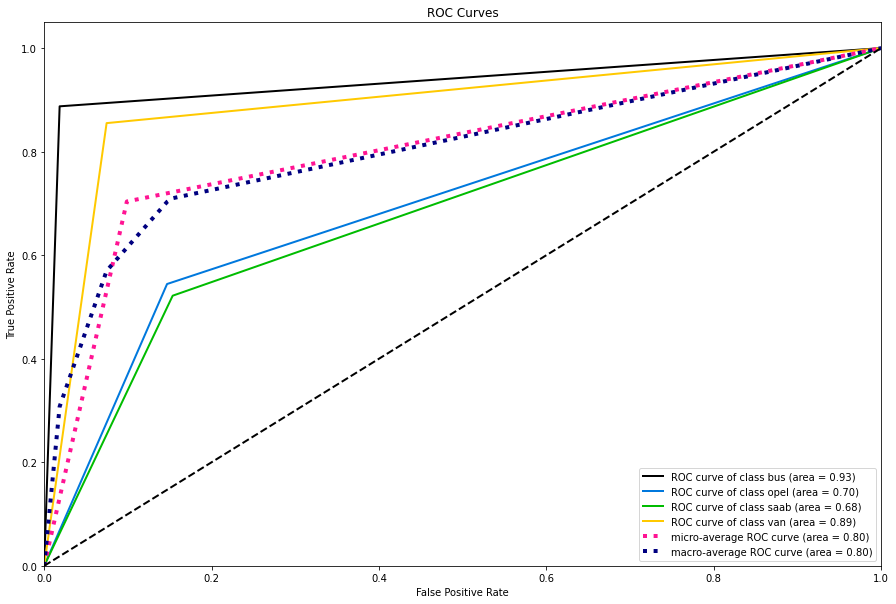

In [85]:
plot_roc(y_test, y_pred_proba, figsize=(15, 10))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [63]:
from sklearn.ensemble import BaggingClassifier

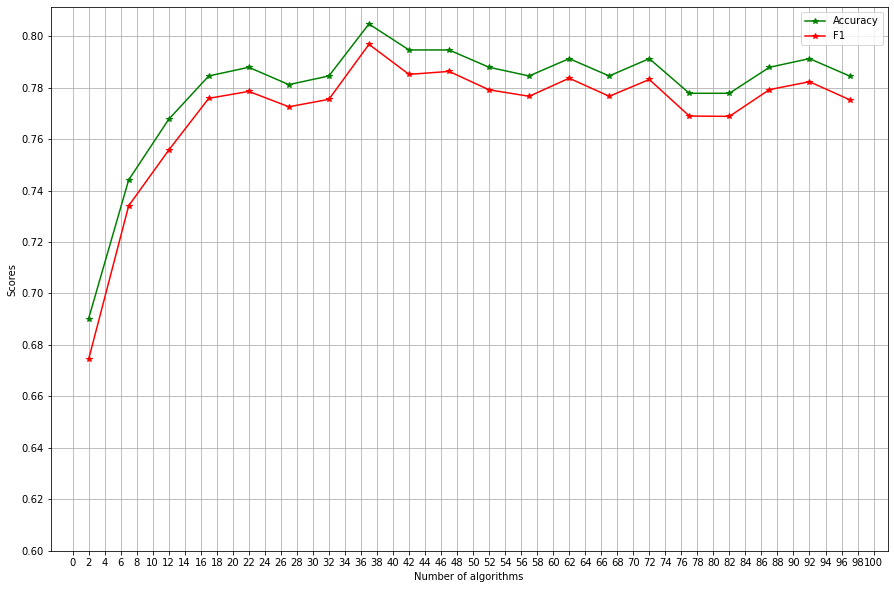

In [140]:
# YOUR CODE HERE
n_min, n_max, step = 2, 100, 5
acc_stats = []
f1_stats = []
f1_cls_stats = []
number_alg = []

for ne in range(n_min, n_max, step):
    model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_features = 'log2')
    tclf = BaggingClassifier(model, n_estimators = ne, random_state = 0).fit(X_train, y_train)

    y_pred_proba = tclf.predict_proba(X_test)
    y_pred = tclf.predict(X_test)

    accuracy = f1_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    f1_cls = f1_score(y_test, y_pred, average = None)
    
    acc_stats.append(accuracy)
    f1_stats.append(f1)
    f1_cls_stats.append(f1_cls)
    number_alg.append(ne)


fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlabel('Number of algorithms')
ax.set_ylabel('Scores')

ax.plot(number_alg, acc_stats, 'g*-')
ax.plot(number_alg, f1_stats, 'r*-')
ax.legend(['Accuracy', 'F1'])
ax.set_xticks(range(0,  102, 2))
ax.set_yticks(np.arange(0.6, 0.8, step=0.02))
ax.grid()
pass

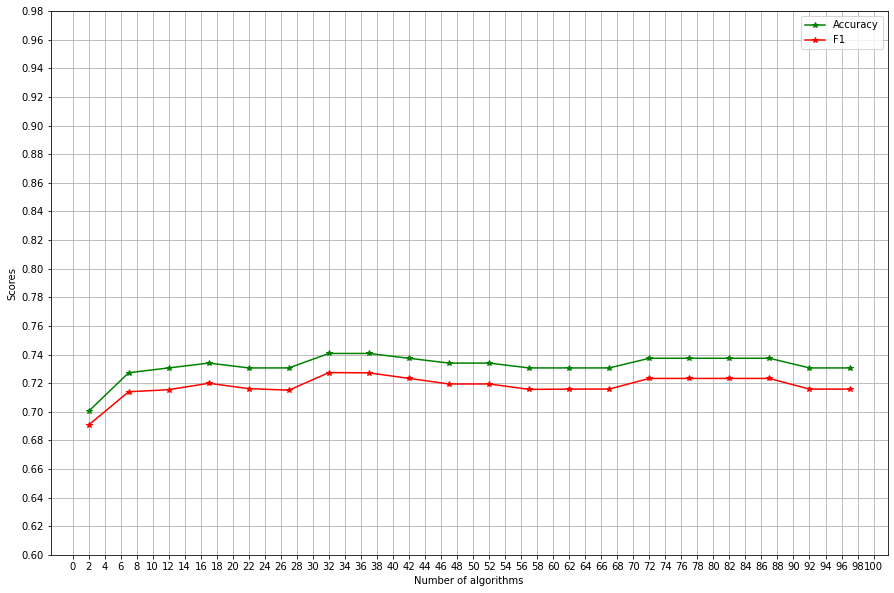

In [141]:
# YOUR CODE HERE
# YOUR CODE HERE
n_min, n_max, step = 2, 100, 5
acc_stats = []
f1_stats = []
f1_cls_stats = []
number_alg = []

for ne in range(n_min, n_max, step):
    model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
    tclf = BaggingClassifier(model, n_estimators = ne, random_state = 0).fit(X_train, y_train)

    y_pred_proba = tclf.predict_proba(X_test)
    y_pred = tclf.predict(X_test)

    accuracy = f1_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    f1_cls = f1_score(y_test, y_pred, average = None)
    
    acc_stats.append(accuracy)
    f1_stats.append(f1)
    f1_cls_stats.append(f1_cls)
    number_alg.append(ne)


fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlabel('Number of algorithms')
ax.set_ylabel('Scores')

ax.plot(number_alg, acc_stats, 'g*-')
ax.plot(number_alg, f1_stats, 'r*-')
ax.legend(['Accuracy', 'F1'])
ax.set_xticks(range(0,  102, 2))
ax.set_yticks(np.arange(0.6, 1, step=0.02))
ax.grid()

I'm think, for that dataset optimal number of algorithms:

1. For decision trees it's maybe 22, because we have closely values of metrics to maximum possible value of metrics and we have  closely half of numbers algorithms needed to obtain maximum value scores in order up value of matrics on 0.02. I think that increasing score 0.02 and increasing numbers of algorithms on 15 is much. But if we are solving problem, where 0.02 - it's   very important (like medicine realm), then i would choose option, with 37 numbers of algorithms. 

2. For Logistic regression it's maybe 7 number  of algorithms. Argumentation similar

3. I think, that hyperparameters which we were choosed for the decision trees not powerful effect on the result in ensemble

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [97]:
from matplotlib.ticker import FormatStrFormatter

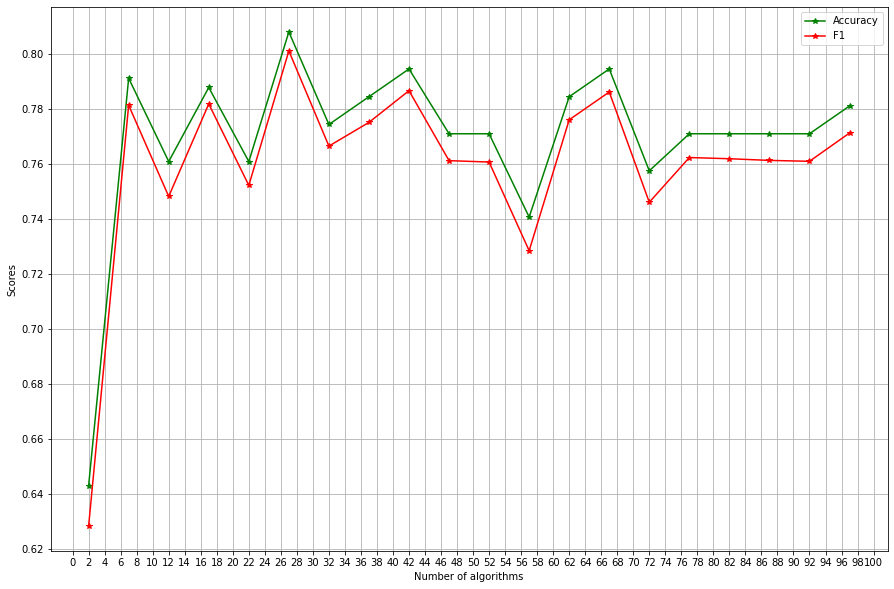

In [131]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

# YOUR CODE HERE
n_min, n_max, step = 2, 100, 5
acc_stats = []
f1_stats = []
f1_cls_stats = []
number_alg = []

for ne in range(n_min, n_max, step):
    model = RandomForestClassifier(n_estimators = ne, max_depth = 100, criterion = 'gini', max_features = 'log2')
    model.fit(X_train, y_train) 

    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    accuracy = f1_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    f1_cls = f1_score(y_test, y_pred, average = None)
    
    acc_stats.append(accuracy)
    f1_stats.append(f1)
    f1_cls_stats.append(f1_cls)
    number_alg.append(ne)


fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlabel('Number of algorithms')
ax.set_ylabel('Scores')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xticks(range(0,  102, 2))
ax.set_yticks(np.arange(0, 1, step=0.02))

ax.plot(number_alg, acc_stats, 'g*-')
ax.plot(number_alg, f1_stats, 'r*-')
ax.grid()

ax.legend(['Accuracy', 'F1'])

In [142]:
np.argmax(f1_stats)*5

30

How i can see. The number of algorithms needed to achive maximum values of scores are located closely to 30:
1. Decision Trees - 37
2. Logistic Regression - 32
3. Random Forest - 27.

But if we choose 7 count of estimators, that we achieve 0.79 score, having GAP  with maximum value (random forest containing 27 number of algorithms) less than 0.02. And it's beautiful optimization in compare with Decision Trees and Logistic Regression. More than 3 times. And my choose depend of what resources we have and how important increase on 0.02. And it would be choice between 7 and 27 count of algorithms.

And if we want model with maximum scores, the Random Forest have better results on scores - we would choose this model. But gap in count of algorithms with others models of it not too big

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [109]:
def get_stats(model, X_test, y_test):
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred = model.predict(X_test)

    accuracy = f1_score(y_test, y_pred, average = 'micro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    f1_cls = f1_score(y_test, y_pred, average = None)
    
    return accuracy, f1, f1_cls

def dict_append(cur_dict, accuracy, f1, f1_cls, k_accuracy = 'accuracy', k_f1 = 'f1', k_f1_cls = 'f1_cls'):
    cur_dict[k_accuracy].append(accuracy)
    cur_dict[k_f1].append(f1)
    cur_dict[k_f1_cls].append(f1_cls)
    return
    

In [110]:
from collections import defaultdict

In [111]:
train_size = X_train_npd.shape[0]
parts_count = 30
part_size = train_size // parts_count

keys = ['f1', 'accuracy', 'f1_cls']
ran_stats = defaultdict(list)
dis_stats = defaultdict(list)
log_stats = defaultdict(list)
train_sizes = []

for i in range(1, parts_count + 1):
    X_train_part = X_train_npd[:part_size*i]
    y_train_part = y_train[:part_size*i]
    train_sizes.append(part_size*i)
    
    ran_forest_model = RandomForestClassifier(n_estimators = ne, max_depth = 65, criterion = 'gini', max_features = 'log2')
    dis_tree_model = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_features = 'log2')
    log_model = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500)
    
    ran_forest_model.fit(X_train_part, y_train_part)
    dis_tree_model.fit(X_train_part, y_train_part)
    log_model.fit(X_train_part, y_train_part)
    
    dict_append(ran_stats, *get_stats(ran_forest_model, X_test_n, y_test))
    dict_append(dis_stats, *get_stats(dis_tree_model, X_test_n, y_test))
    dict_append(log_stats, *get_stats(log_model, X_test_n, y_test))
    

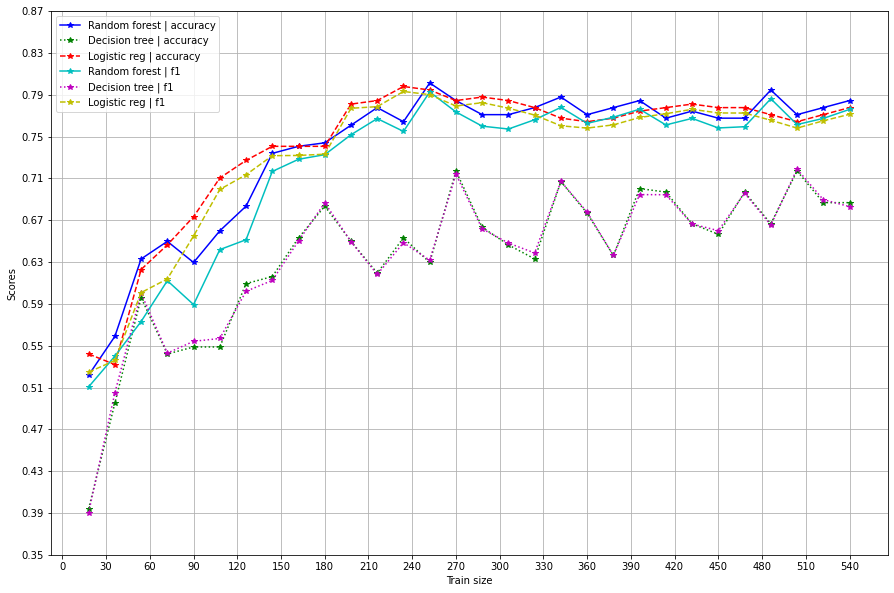

In [127]:
fig, ax = plt.subplots(figsize = (15, 10))
colors =  ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for key, c in zip(['accuracy', 'f1'], range(0, len(colors), 3)):
    ax.set_xlabel('Train size')
    ax.set_ylabel('Scores')
    
    ax.plot(train_sizes, ran_stats[key], f'{colors[c]}*-', label = 'Random forest | ' + key )
    ax.plot(train_sizes, dis_stats[key], f'{colors[c+1]}*:', label = 'Decision tree | ' + key)
    ax.plot(train_sizes, log_stats[key], f'{colors[c+2]}*--', label = 'Logistic reg | ' + key)

ax.legend()
ax.grid()
ax.set_xticks(range(0, train_size, parts_count))
ax.set_yticks(np.arange(0.35, 0.9, step = 0.04))
pass

How we can saw, when we approach to half of train size, then we approach to maximal score of several metrics and coming out on plato. And conclusion of that such is exist situation with classic models, when we are not needed to all data and enough half or closely to half data to approach to maximal score which we might would obtain.